# Exploratory Data Analysis

Quickly evaluate the training data with classical EDA checks. 

## 0.1 imports

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.gofplots import qqplot

# 1. Load the data

In [49]:
train_data_path = Path("../data/202502_data_train.csv")

train_df = pd.read_csv(train_data_path)
train_df

,time,input_variable1,input_variable2,target_variable
0,2025-02-06 09:33:32+00:00,0.032707,981.279743,33.806626
1,2025-02-06 09:44:05+00:00,0.029623,980.900250,33.806626
2,2025-02-06 10:01:06+00:00,0.048860,981.098875,67.613252
3,2025-02-06 10:11:38+00:00,0.049120,980.966079,67.613252
4,2025-02-06 10:26:16+00:00,0.072415,980.819118,84.516565
5,2025-02-06 10:36:49+00:00,0.074022,981.000420,84.516565
6,2025-02-06 10:51:54+00:00,0.144282,980.920937,169.033130
7,2025-02-06 11:02:27+00:00,0.145773,980.889351,169.033130
8,2025-02-06 11:22:46+00:00,0.295737,980.713379,338.066261
9,2025-02-06 11:33:17+00:00,0.297143,980.666672,338.066261


# 2. Make some rapid checks

The input data consists of 2 input variables and 1 target variable, all are numerical (floats). 
* [X] We assume that the time is not a feature (also mentionned in the instructions) -> no feature engineering on the time feature
* [X] check the dtypes and convert if necessary
* [X] convert date data to datetime objects
* [X] make a few plots to analyse the data distribution of the features
* [X] check for colinearity, Pearson correlation
* [X] decide if univariate or bivariate regression task

In [50]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             17 non-null     object 
 1   input_variable1  17 non-null     float64
 2   input_variable2  17 non-null     float64
 3   target_variable  17 non-null     float64
dtypes: float64(3), object(1)
memory usage: 676.0+ bytes


In [51]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
input_variable1,17.0,0.724215,0.888394,0.029623,0.072415,0.295737,0.982547,2.537651
input_variable2,17.0,980.760966,0.245289,980.470043,980.530165,980.713379,980.920937,981.279743
target_variable,17.0,802.410213,963.694880,33.806626,84.516565,338.066261,1098.715348,2704.530088


In [52]:
train_df.duplicated().sum()

np.int64(0)

In [53]:
train_df.isnull().sum()

time               0
input_variable1    0
input_variable2    0
target_variable    0
dtype: int64

In [54]:
train_df.isna().sum()

time               0
input_variable1    0
input_variable2    0
target_variable    0
dtype: int64

In [55]:
train_df["time"] = pd.to_datetime(train_df["time"])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             17 non-null     datetime64[ns, UTC]
 1   input_variable1  17 non-null     float64            
 2   input_variable2  17 non-null     float64            
 3   target_variable  17 non-null     float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 676.0 bytes


In [56]:
# train_df.set_index("time", inplace=True)
train_df.head()

,time,input_variable1,input_variable2,target_variable
0,2025-02-06 09:33:32+00:00,0.032707,981.279743,33.806626
1,2025-02-06 09:44:05+00:00,0.029623,980.900250,33.806626
2,2025-02-06 10:01:06+00:00,0.048860,981.098875,67.613252
3,2025-02-06 10:11:38+00:00,0.049120,980.966079,67.613252
4,2025-02-06 10:26:16+00:00,0.072415,980.819118,84.516565


# 3. Plots

## 3.1 Analysis of distribution of numerical features

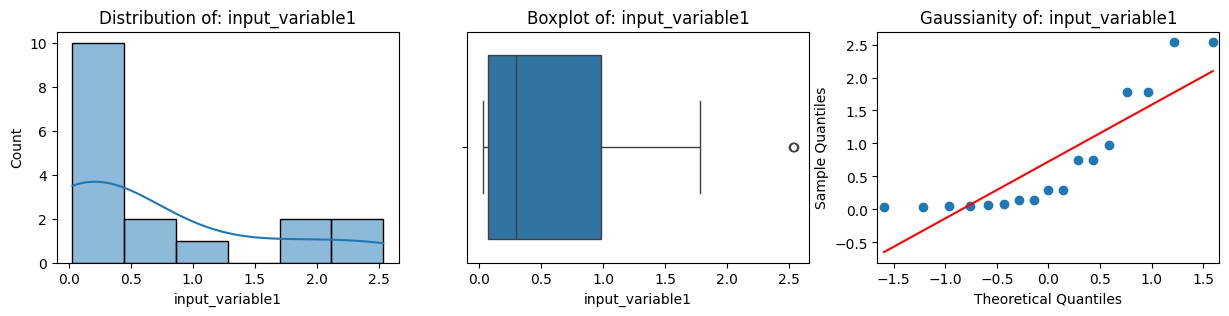

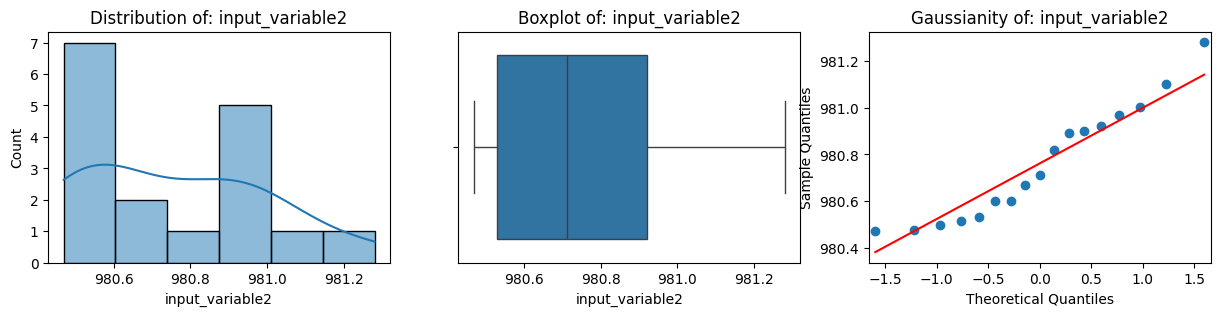

In [57]:
features = ["input_variable1", "input_variable2"]
target = ["target_variable"]

for numerical_feature in train_df[features].columns:

    # Creating three subplots per numerical_feature
    fig, ax =plt.subplots(1,3,figsize=(15,3))

    # Histogram to get an overview of the distribution of each numerical_feature
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    sns.histplot(data = train_df, x = numerical_feature, kde=True, ax = ax[0])

    # Boxplot to detect outliers
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    sns.boxplot(data = train_df, x = numerical_feature, ax=ax[1])

    # Analyzing whether a feature is normally distributed or not
    ax[2].set_title(f"Gaussianity of: {numerical_feature}")
    qqplot(train_df[numerical_feature],line='s',ax=ax[2]);

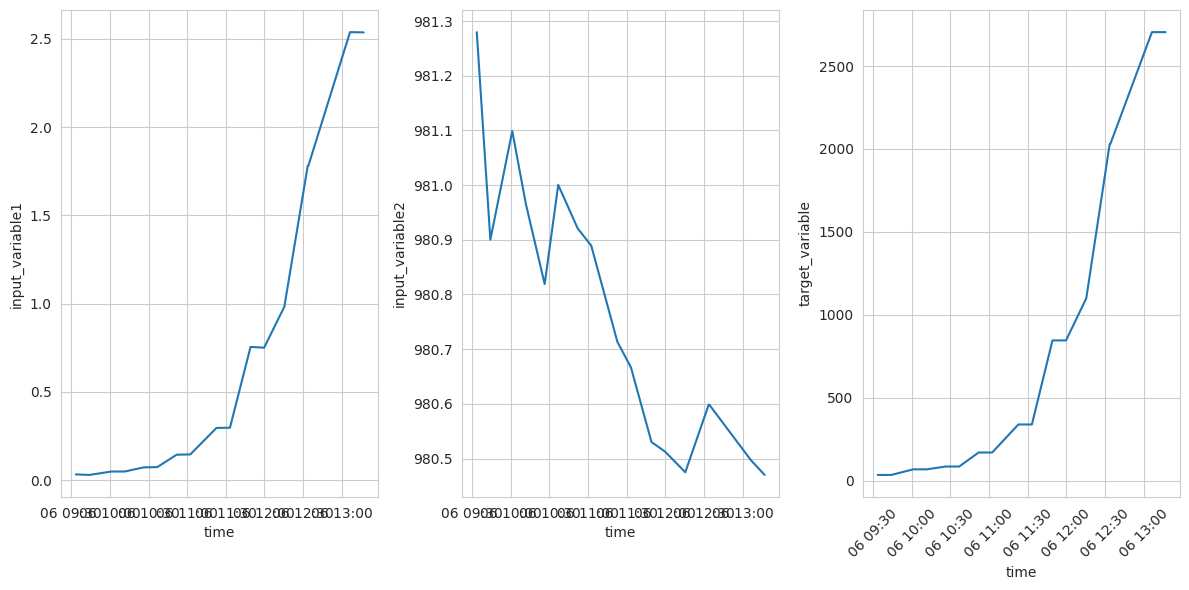

In [ ]:
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(1,3, figsize=(12, 6))
    sns.lineplot(data=train_df, x="time", y="input_variable1", markers='*', ax=axes[0])
    sns.lineplot(data=train_df, x="time", y="input_variable2", ax=axes[1])
    sns.lineplot(data=train_df, x="time", y="target_variable", ax=axes[2])
    # ax.set_title("Water Level Over Time")
    # ax.set_xlabel("Time")
    # ax.set_ylabel("Water Level")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 3.2 Pearson correlation matrix

<Axes: >

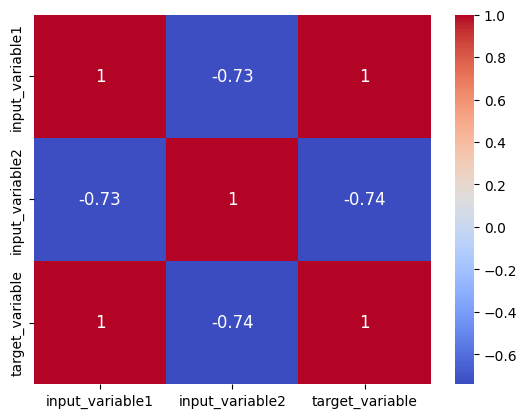

In [13]:
sns.heatmap(
    round(train_df.corr(numeric_only=True), 2),
    cmap="coolwarm",
    annot=True,
    annot_kws={"size":12}
          )

The target variable and the input_variable1 are highly correlated. 

## 3.3 Linear Regression plot

<Axes: xlabel='input_variable2', ylabel='target_variable'>

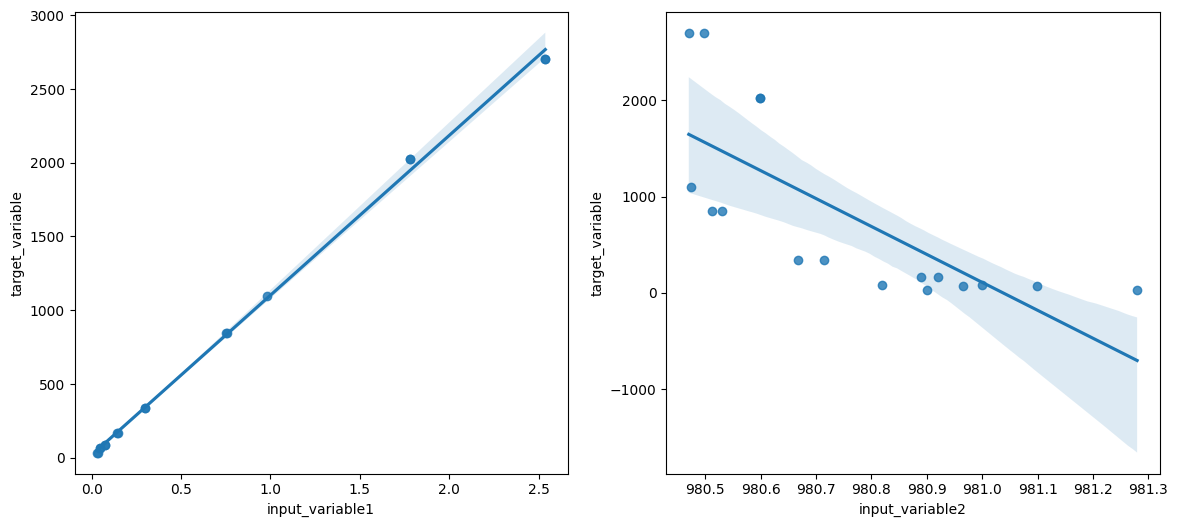

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.regplot(data=train_df, x="input_variable1", y="target_variable", ax=axes[0])
sns.regplot(data=train_df, x="input_variable2", y="target_variable", ax=axes[1])

-> The **variance** of the `target variable` is explained by the **variance** of the `input_variable1`

Let's train a **simple linear regression model** on this feature to predict our target variable... 